# ASSIGNMENT - 5    KARTHIK SANKHAR V (21MIA1152)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
#lets preprocesss our data
df.drop(columns = "CustomerID" , inplace = True)

In [5]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["Gender"] = label.fit_transform(df["Gender"])

In [6]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


For visualizations I tried a new approach.

In [7]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 14.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f39cc859774bbf292f5d42b4aadf70bddfc9cea02371580b74c72be9fac5916c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [8]:
from ydata_profiling import ProfileReport

In [9]:
profile = ProfileReport((df))
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
x = df.drop(columns = "Spending Score (1-100)")
y = df["Spending Score (1-100)"]

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)

In [12]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.3 , random_state = 35 )

In [13]:
from sklearn.cluster import KMeans
max_clusters = 50

In [14]:
kmeans_tests = [KMeans(n_clusters = i , n_init = 10 ) for i in range(1,max_clusters)]

In [15]:
inertais = [kmeans_tests[i].fit(df).inertia_ for i in range(len(kmeans_tests))]

Text(0, 0.5, 'Inertia')

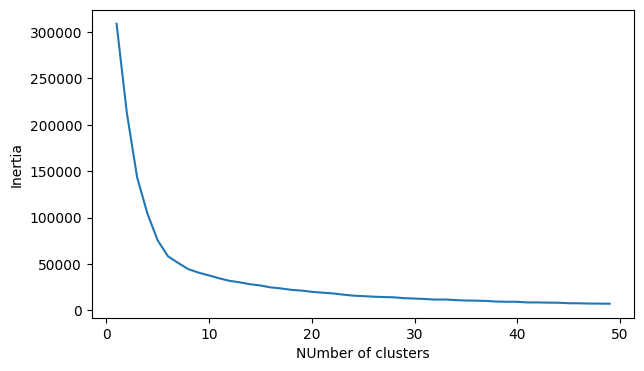

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,4))
plt.plot(range(1,max_clusters) , inertais)
plt.xlabel("NUmber of clusters")
plt.ylabel("Inertia")

In [17]:
kmeans  = KMeans(n_clusters = 10 , n_init = 10)
kmeans.fit(df)

KMeans(n_clusters=10, n_init=10)

In [18]:
clusters = kmeans.predict(df)
clusters

array([7, 3, 0, 3, 7, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 7, 3, 0, 3, 7, 3,
       0, 3, 0, 3, 7, 3, 7, 3, 0, 3, 0, 3, 0, 3, 0, 3, 7, 3, 5, 3, 7, 6,
       7, 3, 5, 6, 7, 7, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 1, 1, 6, 1, 5, 6, 5, 1, 6, 1, 5, 6,
       6, 1, 5, 6, 1, 1, 6, 6, 1, 6, 1, 6, 6, 1, 5, 6, 1, 6, 1, 1, 1, 1,
       1, 6, 1, 6, 6, 6, 1, 1, 1, 1, 6, 1, 1, 8, 6, 8, 1, 8, 4, 8, 4, 8,
       6, 8, 4, 8, 4, 8, 4, 8, 4, 8, 6, 8, 4, 8, 1, 8, 4, 8, 4, 8, 4, 8,
       4, 8, 4, 8, 4, 8, 1, 8, 4, 8, 4, 8, 4, 8, 4, 8, 4, 8, 4, 8, 4, 8,
       4, 8, 4, 2, 9, 2, 9, 2, 9, 2, 9, 2, 9, 2, 9, 2, 9, 2, 9, 2, 9, 2,
       9, 2], dtype=int32)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [20]:
new_data = pd.DataFrame(pca.fit_transform(df) , columns = ["PCA_1", "PCA_2"])

In [21]:
new_data

,PCA_1,PCA_2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


In [22]:
kmeans.cluster_centers_
new_centers = pca.transform(kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [23]:
new_centers

array([[-53.91760749,  -5.3997611 ],
       [ -3.86901534,   5.67498176],
       [ 54.80661772,  18.99216151],
       [  4.98536192, -46.67336912],
       [-18.34617526,  37.67547749],
       [-10.90459454,  -7.48129951],
       [  0.37000747,  -4.89928522],
       [-29.41342812, -16.45650442],
       [ 36.34348987,  -4.85534413],
       [  6.3532035 ,  56.18937394]])

In [24]:
new_data["cluster"] = clusters
new_data

,PCA_1,PCA_2,cluster
0,-31.869945,-33.001252,7
1,0.764494,-56.842901,3
2,-57.408276,-13.124961,0
3,-2.168543,-53.478590,3
4,-32.174085,-30.388412,7
...,...,...,...
195,58.352515,31.017542,2
196,19.908001,66.446108,9
197,58.520804,38.346039,2
198,20.979130,79.376405,9


In [25]:
new_data[new_data["cluster"] == 7].loc[: , "PCA_1"]

0    -31.869945
4    -32.174085
16   -34.505550
20   -32.740014
26   -34.632991
28   -33.885491
38   -32.350647
42   -25.581368
44   -32.058088
48   -16.685788
49   -17.063743
Name: PCA_1, dtype: float64

In [26]:
new_data[new_data["cluster"] == 7].loc[: , "PCA_1"]

0    -31.869945
4    -32.174085
16   -34.505550
20   -32.740014
26   -34.632991
28   -33.885491
38   -32.350647
42   -25.581368
44   -32.058088
48   -16.685788
49   -17.063743
Name: PCA_1, dtype: float64

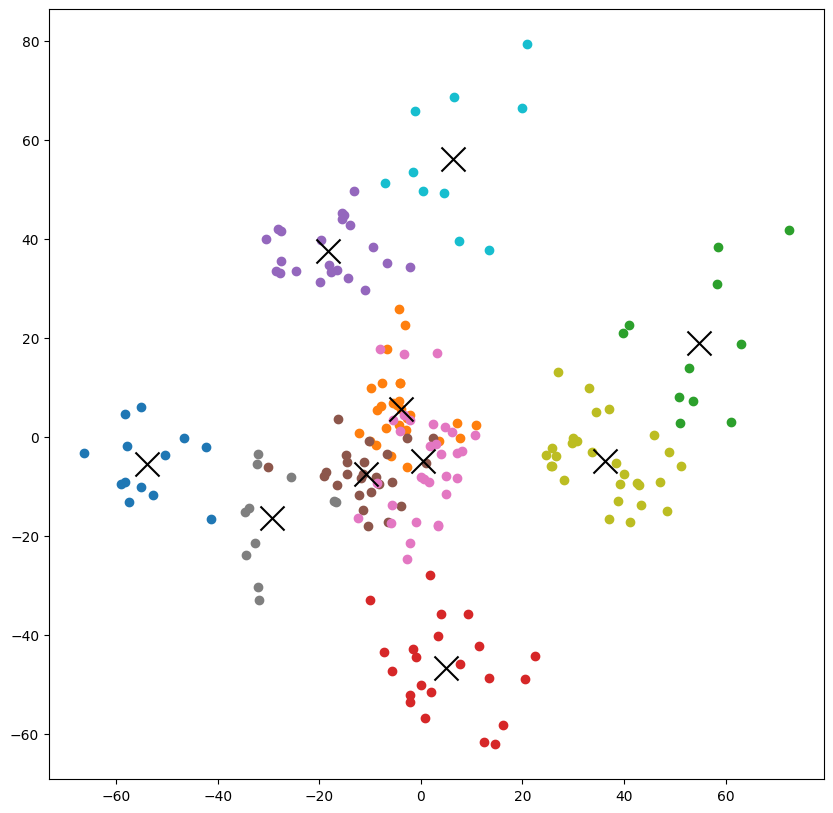

In [27]:
plt.figure(figsize = (10 ,10))
plt.scatter(new_data[new_data["cluster"] == 0].loc[: , "PCA_1"] , new_data[new_data["cluster"] == 0].loc[: , "PCA_2"])
plt.scatter(new_data[new_data["cluster"] == 1].loc[: , "PCA_1"] , new_data[new_data["cluster"] == 1].loc[: , "PCA_2"])
plt.scatter(new_data[new_data["cluster"] == 2].loc[: , "PCA_1"] , new_data[new_data["cluster"] == 2].loc[: , "PCA_2"])
plt.scatter(new_data[new_data["cluster"] == 3].loc[: , "PCA_1"] , new_data[new_data["cluster"] == 3].loc[: , "PCA_2"])
plt.scatter(new_data[new_data["cluster"] == 4].loc[: , "PCA_1"] , new_data[new_data["cluster"] == 4].loc[: , "PCA_2"])
plt.scatter(new_data[new_data["cluster"] == 5].loc[: , "PCA_1"] , new_data[new_data["cluster"] == 5].loc[: , "PCA_2"])
plt.scatter(new_data[new_data["cluster"] == 6].loc[: , "PCA_1"] , new_data[new_data["cluster"] == 6].loc[: , "PCA_2"])
plt.scatter(new_data[new_data["cluster"] == 7].loc[: , "PCA_1"] , new_data[new_data["cluster"] == 7].loc[: , "PCA_2"])
plt.scatter(new_data[new_data["cluster"] == 8].loc[: , "PCA_1"] , new_data[new_data["cluster"] == 8].loc[: , "PCA_2"])
plt.scatter(new_data[new_data["cluster"] == 9].loc[: , "PCA_1"] , new_data[new_data["cluster"] == 9].loc[: , "PCA_2"])
plt.scatter(new_centers[: , 0] , new_centers[: , 1] , color ="black" , marker = "x" , s = 300)